In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data = pd.DataFrame({
    'Potência (kW)': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    'Eficiência (%)': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    'Idade (anos)': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    'Tamanho (m2)': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    'Consumo de Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
})

In [58]:
data.head(10)

,Potência (kW),Eficiência (%),Idade (anos),Tamanho (m2),Consumo de Energia
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [49]:
# Separando as características e o rótulo
X = data[['Potência (kW)', 'Eficiência (%)', 'Idade (anos)', 'Tamanho (m2)']]

y = data['Consumo de Energia']

In [50]:
# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# Treinando um modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
# Fazendo previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

print(X_test)

   Potência (kW)  Eficiência (%)  Idade (anos)  Tamanho (m2)
8            115              88             3            56
1             80              65             8            45
5            130              95             2            62


In [53]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", classification_rep)

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



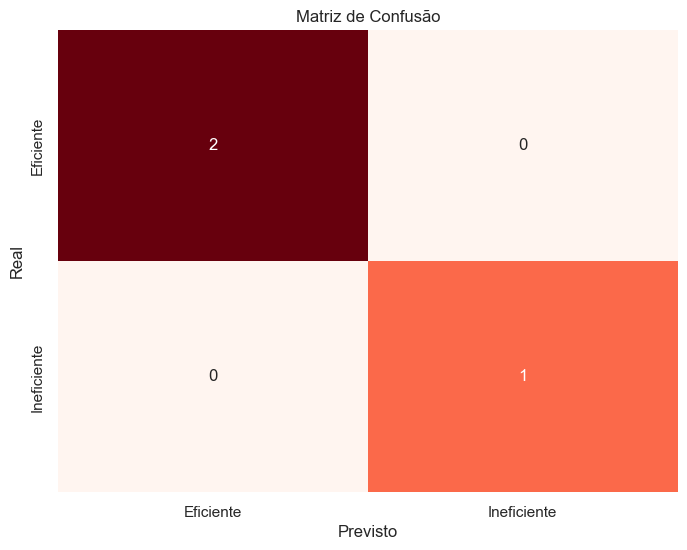

In [55]:
# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Eficiente', 'Ineficiente'],
            yticklabels=['Eficiente', 'Ineficiente'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

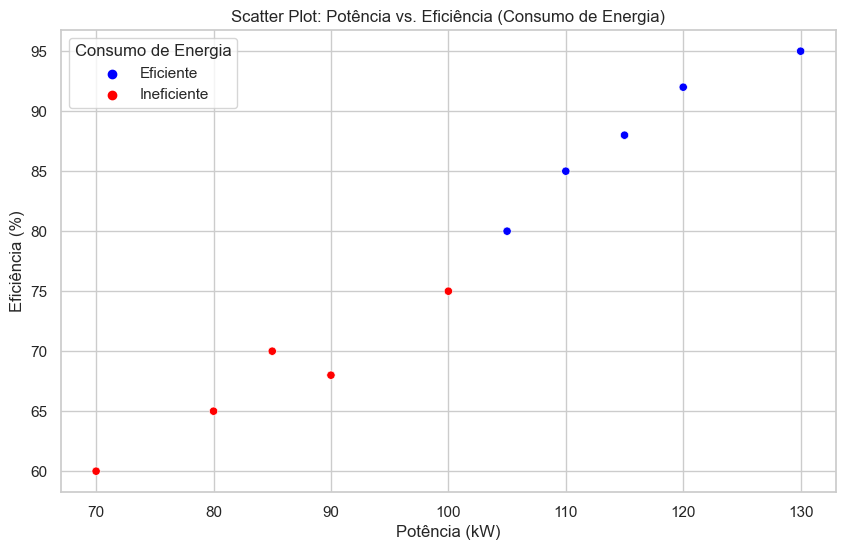

In [42]:
# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

# Mapeando as cores com base na classe
palette = {"Ineficiente": "red", "Eficiente": "blue"}

# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potência (kW)', y='Eficiência (%)', hue='Consumo de Energia', data=data, palette=palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potência vs. Eficiência (Consumo de Energia)')
plt.xlabel('Potência (kW)')
plt.ylabel('Eficiência (%)')

# Mostrando o gráfico
plt.legend(title='Consumo de Energia')
plt.show()